In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import rdkit
print(rdkit.__version__)

2023.03.1


# Making it easy to calculate all 2D descriptors

There used to be a bit of a dance required in order to calculate all of the 2D descriptors. We've cleared that up in this release by adding a single function `Descriptors.CalcMolDescriptors()` which does the work.

This is embarassingly simple to demonstrate:

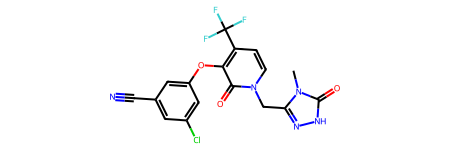

In [2]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine

In [3]:
from rdkit.Chem import Descriptors
descrs = Descriptors.CalcMolDescriptors(doravirine)
descrs

{'MaxAbsEStateIndex': 13.412553309006833,
 'MaxEStateIndex': 13.412553309006833,
 'MinAbsEStateIndex': 0.045220418860841605,
 'MinEStateIndex': -4.871620672188628,
 'qed': 0.6914051268589834,
 'MolWt': 425.754,
 'HeavyAtomMolWt': 414.66600000000005,
 'ExactMolWt': 425.050251552,
 'NumValenceElectrons': 150,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.4197525104273902,
 'MinPartialCharge': -0.45079941098947357,
 'MaxAbsPartialCharge': 0.45079941098947357,
 'MinAbsPartialCharge': 0.4197525104273902,
 'FpDensityMorgan1': 1.3103448275862069,
 'FpDensityMorgan2': 2.0344827586206895,
 'FpDensityMorgan3': 2.6206896551724137,
 'BCUT2D_MWHI': 35.495691906445956,
 'BCUT2D_MWLOW': 10.182401353178236,
 'BCUT2D_CHGHI': 2.363442602497937,
 'BCUT2D_CHGLO': -2.1532454345808074,
 'BCUT2D_LOGPHI': 2.362094239067197,
 'BCUT2D_LOGPLOW': -2.2620565247489415,
 'BCUT2D_MRHI': 6.30376236817795,
 'BCUT2D_MRLOW': -0.13831572005086737,
 'AvgIpc': 2.951845570725043,
 'BalabanJ': 2.1143058157682066,
 'BertzC

# Improved rendering of generic query atoms

Molecules with "standard" generic query atoms (A, Q, M, X, etc.) read in from mol/SDF files are now rendered much more naturally than in previous versions.

Here's an example:

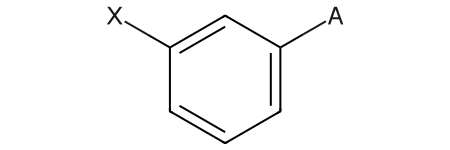

In [4]:
qmol = Chem.MolFromMolBlock('''
  Mrv2305 04202308462D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -2.6667 3.8734 0 0
M  V30 2 C -4.0003 3.1034 0 0
M  V30 3 C -4.0003 1.5633 0 0
M  V30 4 C -2.6667 0.7933 0 0
M  V30 5 C -1.333 1.5633 0 0
M  V30 6 C -1.333 3.1034 0 0
M  V30 7 A 0.0007 3.8733 0 0
M  V30 8 X -5.334 3.8733 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 6 7
M  V30 8 1 2 8
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qmol

As a reminder, this is what these looked like in previous versions:

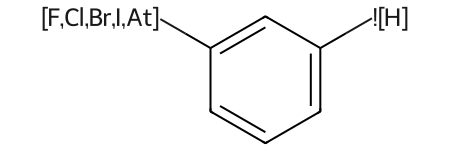

In [5]:
IPythonConsole.drawOptions.useComplexQueryAtomSymbols = False
qmol

In [6]:
IPythonConsole.drawOptions.useComplexQueryAtomSymbols = True

# ChEMBL filter sets now available in the FilterCatalog

This is based on Pat Walters' [version of the ChEMBL filters](https://github.com/PatWalters/rd_filters)

In [7]:
from rdkit.Chem import rdfiltercatalog

fcp = rdfiltercatalog.FilterCatalogParams()
fcp.AddCatalog(rdfiltercatalog.FilterCatalogParams.FilterCatalogs.CHEMBL)
fc = rdfiltercatalog.FilterCatalog(fcp)
fc.GetNumEntries()

770

In [8]:
m = Chem.MolFromSmiles('c1ccccc1CCl')
l = fc.GetMatches(m)
len(l)

7

In [9]:
for entry in l:
    print(entry.GetDescription())


R1 Reactive alkyl halides
alkyl halide
primary_halide_sulfate
alkyl_halides
alkyl halide
Filter6_benzyl_halide
alkyl halide


I've deliberately picked an example which demonstrates why one needs to be careful with these things. :-)

# Improved handling of organometallic species

This is part of an ongoing series of improvements to do a better job handling organometallic species.

In this release the major changes are to support switching between two common representations of molecules like ferrocene:

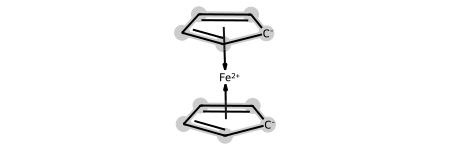

In [10]:
ferrocene = Chem.MolFromMolBlock('''
  Mrv2211 04212306592D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 12 2 0 0
M  V30 BEGIN ATOM
M  V30 1 C -4.4799 15.329 0 0 CHG=-1
M  V30 2 C -5.2994 16.3341 0 0
M  V30 3 C -8.0977 16.3517 0 0
M  V30 4 C -9.0012 15.3605 0 0
M  V30 5 C -6.794 14.7503 0 0
M  V30 6 C -4.3949 10.4304 0 0 CHG=-1
M  V30 7 C -5.2144 11.4355 0 0
M  V30 8 C -8.0127 11.4531 0 0
M  V30 9 C -8.9162 10.4619 0 0
M  V30 10 C -6.6924 9.8351 0 0
M  V30 11 Fe -6.6772 12.9717 0 0 CHG=2
M  V30 12 * -6.7645 15.6718 0 0
M  V30 13 * -6.6461 10.7232 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 9 12 11 ENDPTS=(5 1 2 3 4 5) ATTACH=ALL
M  V30 2 4 1 5
M  V30 3 4 4 5
M  V30 4 4 4 3
M  V30 5 4 2 3
M  V30 6 4 1 2
M  V30 7 4 6 10
M  V30 8 4 9 10
M  V30 9 4 9 8
M  V30 10 4 7 8
M  V30 11 4 6 7
M  V30 12 9 13 11 ENDPTS=(5 6 7 8 9 10) ATTACH=ALL
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 DAT 0 ATOMS=(1 1) FIELDNAME=MRV_IMPLICIT_H -
M  V30 FIELDDISP="    0.0000    0.0000    DR    ALL  0       0" -
M  V30 FIELDDATA=IMPL_H1
M  V30 2 DAT 0 ATOMS=(1 6) FIELDNAME=MRV_IMPLICIT_H -
M  V30 FIELDDISP="    0.0000    0.0000    DR    ALL  0       0" -
M  V30 FIELDDATA=IMPL_H1
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
ferrocene

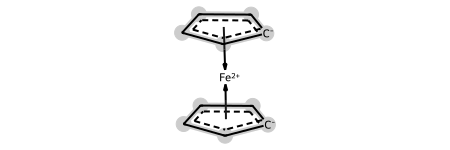

In [11]:
IPythonConsole.kekulizeStructures = False
ferrocene

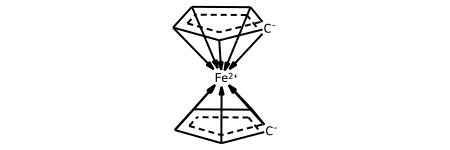

In [18]:
dative_ferro = Chem.HapticBondsToDative(ferrocene)
Chem.SanitizeMol(dative_ferro)
dative_ferro

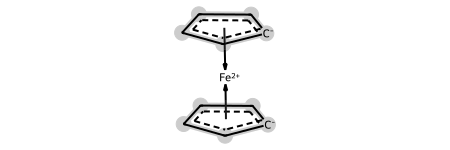

In [20]:
ferro2 = Chem.DativeBondsToHaptic(dative_ferro)
Chem.SanitizeMol(ferro2)
ferro2

This, of course, also works with other haptic bonds:

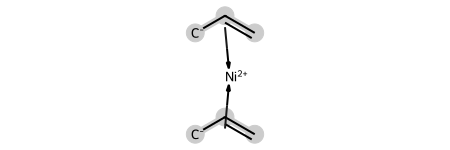

In [26]:
ni_complex = Chem.MolFromMolBlock('''
  Mrv2211 05012317022D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -10.7917 -1.75 0 0 CHG=-1
M  V30 2 C -9.458 -0.98 0 0
M  V30 3 C -8.1243 -1.75 0 0
M  V30 4 * -9.458 -1.4933 0 0
M  V30 5 C -10.792 -6.2983 0 0 CHG=-1
M  V30 6 C -9.4583 -5.5283 0 0
M  V30 7 C -8.1246 -6.2983 0 0
M  V30 8 * -9.4583 -6.0416 0 0
M  V30 9 Ni -9.25 -3.7083 0 0 CHG=2
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 5 6
M  V30 4 2 6 7
M  V30 5 9 4 9 ENDPTS=(3 1 2 3) ATTACH=ALL
M  V30 6 9 8 9 ENDPTS=(3 5 6 7) ATTACH=ALL
M  V30 END BOND
M  V30 END CTAB
M  END
''')
ni_complex

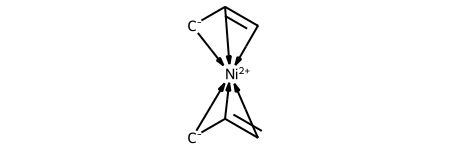

In [30]:
dative_ni= Chem.HapticBondsToDative(ni_complex)
Chem.SanitizeMol(dative_ni)
dative_ni

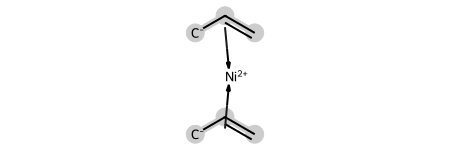

In [33]:
ni2 = Chem.DativeBondsToHaptic(dative_ni)
Chem.SanitizeMol(ni2)
ni2

# Drawing molecules in arbitrary locations on a canvas

By using the new `MolDraw2D.SetFlexiMode()` and `MolDraw2D.SetOffset()` methods, it's now possible to draw molecules in arbitrary locations on the `MolDraw2D` canvas. This, with a bit of work, allows considerably more complex molecular graphics to be created.

Here's an example... I hope to show something more useful in a future post.

In [12]:
# structures from: https://pubs.acs.org/doi/10.1021/acs.jmedchem.3c00210
hit = Chem.MolFromSmiles('c1ccc(o1)-c1cc(n(n1)C(=O)CCC(=O)O)-c1c(Cl)nc2cc(C)ccc2c1')
lead = Chem.MolFromSmiles('c1ccc(o1)-c1cc(nn1C(C)(C)C)-c1[nH]c2ccc(Cl)cc2n1')
interm = Chem.MolFromSmiles('c1ccc(o1)-c1cc(nn1C(C)(C)C)-c1oc2ccccc2n1')

In [13]:
hitLabel = 'Hit 1a\nP2Y6R : 0.126 uM'
leadLabel = '50\nP2Y6R : 5.9 nM'
intermLabel = '16\nP2Y6R : 30.8 nM'

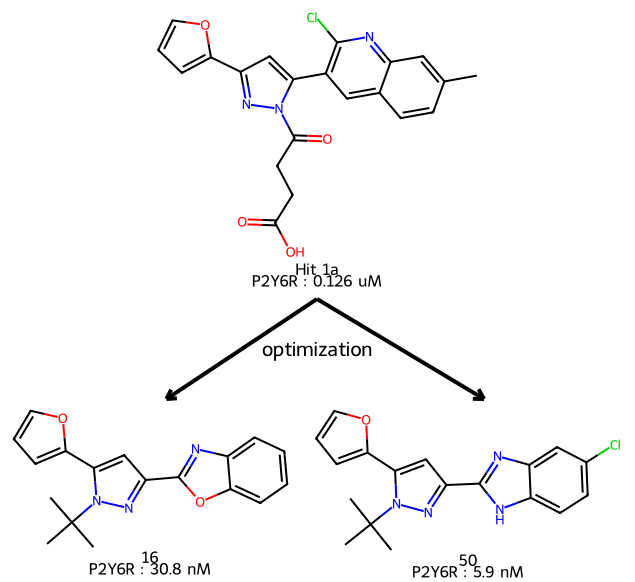

In [14]:
from IPython.display import SVG

from rdkit import Geometry
from rdkit.Chem.Draw import rdMolDraw2D
sizer = rdMolDraw2D.MolDraw2DSVG(-1,-1)
hit_sz = sizer.GetMolSize(hit,legend=hitLabel)
lead_sz = sizer.GetMolSize(lead,legend=leadLabel)
interm_sz = sizer.GetMolSize(interm,legend=intermLabel)

arrowLength = 100
arrowPadding = 10

width = max((lead_sz[0]+interm_sz[0]),hit_sz[0])
secondRowHeight = max(lead_sz[1],interm_sz[1])
height = secondRowHeight+hit_sz[1]+arrowLength + arrowPadding
d2d = rdMolDraw2D.MolDraw2DSVG(width,height)
d2d.SetFlexiMode(True)
d2d.ClearDrawing()
d2d.drawOptions().clearBackground = False
d2d.SetOffset(width//2 - hit_sz[0]//2,0)
d2d.DrawMolecule(hit,legend=hitLabel)

d2d.SetOffset(0,height-secondRowHeight)
d2d.DrawMolecule(interm,legend=intermLabel)

d2d.SetOffset(width - lead_sz[0],height-secondRowHeight)
d2d.DrawMolecule(lead,legend=leadLabel)


arrowStart = Geometry.Point2D(width//2,hit_sz[1]+arrowPadding/2)
arrowEnd1 = arrowStart + Geometry.Point2D(0,arrowLength)
arrowEnd1.x -= interm_sz[0]/2
arrowEnd2 = arrowStart + Geometry.Point2D(0,arrowLength)
arrowEnd2.x += lead_sz[0]/2

d2d.SetOffset(0,0)
d2d.SetLineWidth(4)
d2d.DrawArrow(arrowStart,arrowEnd1,rawCoords=True)
d2d.DrawArrow(arrowStart,arrowEnd2,rawCoords=True)

labelPos = arrowStart
labelPos.y += arrowLength/2
d2d.SetFontSize(d2d.FontSize()*1.5)
d2d.DrawString("optimization",labelPos,0,rawCoords=True)

d2d.FinishDrawing()

SVG(d2d.GetDrawingText())